In [27]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
    

# The Healthcare Cost Report Information System (HCRIS) 

## Guide to HCRIS Database
Each medicare-certified provider must submit an annual report to Center for Medicare&Medicaid Services. It is very comprehensive relational database which includes provider information such as facility characteristics, utilization data, cost and charges by cost center (in total and for Medicare), Medicare settlement data, and financial statement data. These providers in HCRIS are as follows: 
- the Hospital Cost Report (CMS-2552-96 and CMS-2552-10)
- Skilled Nursing Facility Cost Report (CMS-2540-96 and CMS-2540-10), 
- Home Health Agency Cost Report (CMS-1728-94)
- Renal Facility Cost Report (CMS-265-94 and CMS-265-11) 
- Health Clinic Cost Report (CMS-222-92) 
- Hospice Cost Report (CMS-1984-99) 
- Federally Qualified Health Clinic Cost Report (CMS-224-14)
- Community Mental Health Center Cost Report (CMS-2088-92)

We are only interested in Hospital reports CMS-2552-96 and CMS-2552-10. The last two digits in paranthesises above represent the format (year) of that system. For example, the hospital cost report has two formats, 1996 and 2010. Since CMS changed the Hospital cost report format in 2010, there are two subsystems in the hospital system. 

For detail instruction, the best source is the visit the [CMS website](https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/Cost-Reports/). It is a long journey to understand the structure and complexity of the database. However, to access the data easier, best alternative is [NBER website](http://www.nber.org/data/hcris.html) Many thanks to Jean Roth. For stata users, there is a nice public good created by [Adam Sacarny](https://github.com/asacarny/hospital-cost-reports). His work helped me figure out the cost report structure much better than CMS's website. Also instead of merging the data from the scratch, I used his data for starter and added new variables that I need to that data. 

First step is to understand the structure of database such as key variables that links all the table. Since it is not regular one-file dataset, we need to determine the data that we need for our study. For that reason, we need to know which worksheet code, line, and column that we can use to extract the data from the cost report forms. One time-consuming but better way to look at [this CMS link](https://www.cms.gov/Regulations-and-Guidance/Guidance/Manuals/Paper-Based-Manuals-Items/CMS021935.html).The provider reimbersument manual includes all the cost report forms and instructions. Since we are interested in Hospital reports we will select and download Chapter 40. In the zip file, there are two pdf files; one is [forms](https://github.com/msari6/CommunityBenefits_SDOH/blob/master/HCRIS/P152_40/R15P240f.pdf), other is [instructions](https://github.com/msari6/CommunityBenefits_SDOH/blob/master/HCRIS/P152_40/R15P240.pdf). An alternative link is [Cost report data website](https://www.costreportdata.com/worksheet_formats.html). It has an organized way to access each forms and instructions. Let's say I need to get total bad debt expense for entire hospital complex. I need to look at line 26 and column 1 at [Worksheet S-10](https://www.costreportdata.com/worksheets/Form_S100.pdf) form. 

Now we have:   
- Worksheet Code ='S100000' 
- Line Number ='02600'
- Column Number ='00100' 

## Community Benefit Project 

CMS defines uncompensated care in the instruction document as follows:

> Uncompensated care consists of charity care, non-Medicare bad debt, and non-reimbursable
Medicare bad debt. Uncompensated care does not include courtesy allowances, discounts given
to patients that do not meet the hospital’s charity care policy, or discounts given to uninsured
patients that do not meet the hospital's FAP, or bad debt reimbursed by Medicare.

I need to look at [Worksheet S-10](https://www.costreportdata.com/worksheets/Form_S100.pdf) to obtain uncompensated care data. To have comparable data across the hospitals, I will have uncompensated care costs as percentage of total operating expenses. Based on the definition of CMS I need three parts from the cost reports to have uncompensated care cost.

1. Charity Care Costs
2. Non-Medicare Bad Debt
3. non-reimbursable Medicare Bad Debt.

The lines I need:

- Charity Care Cost: Worksheet S-10, Line 20 , Column 3
- Charity Care Cost: Worksheet S-10, Line 22, Column 3
- Charity Care Cost: Worksheet S-10, Line 23, Column 3
- Total bad debt expense: Worksheet S-10, Line 26, Column 1
- Non-reimbursable Medicare Bad Debt: Worksheet S-10, Line 27, Column 1
- Medicare allowable bad debts: Worksheet S-10, Line 27.01, Column 1
- Non-Medicare Bad Debt: Worksheet S-10, Line 28, Column 1
- Total Operating Expense: Worksheet G-3, Line 4, Column 1

One important note here is that beginning October 1, 2013 hospitals calculate non-medicare bad debt expense (Line 28) by substracting Medicare allowable bad debts (Line 27.01) from total bad debt expense for the entire hospital complex (Line 26). However, Line 27 was used instead of Line 27.01 before October 1, 2013. For that it is better to adjust the data to have consistent calculation for each year. Line 29 is the sum of the non-Medicare bad debt expense (Line 28) and the non-reimbursable Medicare bad debt expense (Line 27.01 - Line 27).  

Here is the Uncompensated Care calculation:

> UC = Charity Care Costs + Non-Medicare Bad Debt + Non-reimbursable Medicare Bad Debt

> UC = (Line 20 - Line 22) + (Line 28) + (Line 27.01 - Line 27)

Then UC will be divided by total operating expense to obtain the percentage. 

In [this post](https://github.com/msari6/CommunityBenefits_SDOH/blob/master/HCRIS/Comment%20on%20Uncompensated%20Care%20in%20HCRIS.md), I explained how I calculated the uncompensated care line by line and overcomed the change happened in 2013.

Here is an example how uncompensated care (charity care and bad debt) is calculated in Worksheet S-10. 
A hospital has a charity care policy which determines charity care on a “sliding scale” basis and
may forgive anywhere from 25% to 100% of the patient’s liability. An uninsured patient owes the hospital 1000 dollars for an allowable hospital service. The patient applies for charity care, and the hospital determines that the uninsured patient qualifies for charity care at 60%. The hospital records the entire 1000 dollars charge as charity care on line 20, column 1. The remaining 400 dollars is the patient’s liability and must be recorded on line 22 as this is a patient liability for which the hospital expects to receive payment. The uninsured patient pays 100 dollar toward his 400 dollars liability. The 100 dollars patient payment does not get recorded on Worksheet S-10 because the 400 dollars full patient liability was already recorded as an expected payment on line 22. If the 300 dollars balance remains unpaid and the hospital determines it to be a bad debt, it can be recorded as a hospital bad debt on line 26. 

> UC = (Line 20 - Line 22) + Line 26
> UC = (1000 - 400) + 300 = 900 dollars

So the total uncompensated care recorded for that patient in the hospital report is 900 dollars. For more example here is the [link](https://www.cms.gov/Outreach-and-Education/Medicare-Learning-Network-MLN/MLNMattersArticles/Downloads/se17031.pdf)

In Schedule H,  the community benefit expense calculation is showned in [Worksheet 1 at the Schedule H instruction](https://www.irs.gov/pub/irs-pdf/i990sh.pdf). For example, here is "Financial Assistance at Cost" category of community benefits calculation:

 1. Calculate Amount of gross patient charges written off under financial assistance policies
 2. Ratio of patient care cost to charges which is asked in the form (cost-to-charge ratio)
 3. Estimate cost (multiply gross patient charges by ratio)
 4. Calculate Medicaid provider taxes, fees, and assessments
 5. Add the estimate cost (3) to (4) and find **total community benefit expense**
 6. Calculate revenue from uncompensated care pools or programs 
 7. Other direct offsetting revenue
 8. Add 6 to 7 and find **Total direct offsetting revenue **
 9. Substract **total community benefit expense** from **Total direct offsetting revenue ** and find **Net community benefit expense**
 10. Calculate percent of total expense. The numerator is **Net community benefit expense** and the denominator comes from Form 990, Part IX, line 25, column (A) total functional expense.
 
I will use the percentage of total operating expense for the reason I addressed above. 
Here is an empirical question: As the calculation shows medicaid provider taxes, fees, and assessments are part of financial assistance category which is a big share of total community benefit provision. As an indirect provision, what is the share of medicaid-related fees in the CB provision?
 
### How IRS defines the calculation of the patient care cost to charges ratio (CCR) ?

[The worksheet 2](https://www.irs.gov/pub/irs-pdf/i990sh.pdf) (page 15) in the Schedule H instruction guides hospitals how to calculate the ratio unless hospitals did not choose other cost accounting method or system. 

- CCR =  Adjust Patient Care Cost  / Adjusted Gross Patient Charges 
- Adjusted Patient Care Cost = Total operation expense - Nonpatient expense 
- Adjusted Gross Patient Charges = Gross Patient Charges - Gross charges for community benefit programs

 
IRS 990 Form includes 8 categories of community benefits while Cost report data include only bad debt and charity care. In order to have comparable data, I will calculate uncompensated care costs as percent of total expense for each hospital. 


In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import os.path
import warnings
# Set ipython's max row display to 100
pd.set_option('display.max_row', 100)

# Set iPython's max column width to 60
pd.set_option('display.max_columns', 125)
# set python's display of numbers to make it more human readable 
pd.set_option('display.float_format', '{:20,.2f}'.format)

In [2]:
data_folder = os.path.join(*["/home","msari", "Project1", "RawData", "HCRIS"])
hcris = os.path.join(data_folder, "hcris_merged_hospyear.csv")

In [3]:
# The data covers cost reports from 2000 to 2016. 
cp = pd.read_csv(hcris, low_memory=False)

In [4]:
cp['covg_begin_dt'] = pd.to_datetime(cp['covg_begin_dt'], format = '%d%b%Y', errors = 'ignore') 

Let's look at the summary statistics of the data. Right now the dataset does not have zipcode or provider location info. Later in this report it will be added by merging with AHA data and provider id data from CMS to get accurate info about provider location.

In [5]:
cp.describe()

,pn,year,beds_adultped_wtd,beds_totadultped_wtd,beds_total_min,beds_total_max,beds_total_wtd,availbeddays_adultped,ipbeddays_adultped,ipdischarges_adultped,income,totcost,margin,uccare_chg_harmonized,uccare_cost_harmonized,netpatrev,othinc,opexp,othexp,donations,invinc,iphosprev,ipgenrev,ipicrev,iprcrev,ipancrev,ipoprev,iptotrev,opancrev,opoprev,optotrev,tottotrev,ccr_min,ccr_max,ccr_wtd,chguccare,totinitchcare,ppaychcare,nonmcbaddebt,costuccare_v2010,nreports,nfmt96,nfmt10,nno_uncomp,frac_year_covered,flag_short,flag_long,cost_nonmdc_reimb_bdebt,costofcharitycare,totbaddebtexp,mdc_reimb_bdebt,mdc_allow_bdebt,costof_unc_care,costof_unc_care_adj,costof_uc_prct_totexp,costof_uc_prct_totexp1
count,"99,045.00","99,045.00","97,590.00","97,590.00","97,415.00","97,415.00","97,621.00","97,395.00","97,246.00","97,262.00","97,540.00","97,540.00","95,270.00","97,540.00","67,709.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","67,709.00","67,709.00","73,428.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","99,045.00","99,045.00","99,045.00","99,045.00","99,045.00","99,045.00","99,045.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","97,540.00","67,709.00","67,372.00","96,891.00"
mean,"266,621.12","2,008.48",175.83,175.83,191.38,195.85,193.23,"51,864.31","24,252.66","5,688.22","120,153,182.76","115,544,790.14","-1,203.58","13,734,421.83","6,273,621.49","110,672,949.03","9,480,233.70","114,071,357.29","1,473,432.85","313,255.14","885,962.38","41,412,720.44","46,746,832.49","14,367,698.88","61,114,531.37","126,354,971.13","3,868,501.31","192,872,225.21","90,474,085.79","40,721,974.86","137,761,381.69","330,633,606.90",1.45,1.95,2.00,"4,650,119.15","5,368,324.23","99,230.79","3,815,209.24","2,655,268.59",1.61,0.98,0.63,0.17,0.98,0.05,0.00,"313,849.74","1,531,788.91","2,017,385.02","80,962.43","111,002.50","7,205,516.04","2,923,638.49",0.02,0.04
std,"153,661.02",4.61,"19,501.54","19,501.54","19,518.93","19,519.89","19,498.59","3,518,524.71","35,355.01","8,441.53","231,371,202.67","214,396,809.52","220,811.69","80,877,409.34","59,939,105.78","208,230,494.35","47,928,442.20","212,309,030.53","12,713,967.35","3,191,718.94","5,686,241.50","110,973,475.61","120,064,042.70","46,441,463.06","156,491,254.73","276,857,136.37","22,141,523.14","414,858,592.99","210,535,274.84","126,318,485.78","283,864,844.56","673,629,397.47",23.26,53.83,39.21,"23,479,721.47","32,207,064.79","1,176,666.97","66,944,210.20","27,466,944.59",0.50,0.85,0.83,0.48,0.12,0.22,0.01,"2,185,110.28","13,672,363.15","9,843,629.15","300,966.63","482,992.54","37,008,658.05","21,683,804.91",0.08,0.10
min,"10,001.00","2,001.00",1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,"-3,121,932,864.00","-75,562,659.25","-48,267,368.00","-12,159,279.00","-157,275,116.00","-3,292,672,161.78","-2,211,753,344.00","-75,565,986.02","-391,603,432.00","-120,312,702.00","-332,499,416.00","-16,032,271.00","-16,032,271.00","-16,698,137.00","-16,032,271.00","-6,334,094.64","-87,811,331.00","-11,354,309.98","-9,291,365.43","-1,197,235,963.99","-9,485,422.26","-17,244,267.88",0.00,0.00,0.00,"-128,490.00","-14,538,724.42","-12,395,972.36","-13,283,251.15","-157,275,119.09",1.00,0.00,0.00,0.00,0.00,0.00,0.00,"-49,338,942.96","-21,075,574.00","-20,589,234.40","-131,053.00","-201,620.00","-27,364,834.00","-98,444,996.00",-3.07,-1.64
25%,"140,207.00","2,004.00",25.00,25.00,25.00,25.00,25.00,"9,125.00","2,916.80",549.40,"14,002,741.25","14,452,955.38",-0.02,0.00,0.12,"12,733,197.01","298,167.47","14,292,993.25",0.00,0.00,0.00,"2,094,070.45","3,291,734.22",0.00,"3,534,779.30","3,558,153.98",0.00,"9,824,711.87",1.00,0.00,"6,406,973.96","24,158,191.18",0.25,0.26,0.27,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"260,005.00","2,008.00",65.00,65.00,70.00,72.00,71.00,"23,360.00",

In [6]:
cp.groupby('year')['pn'].nunique()

year
2001    6231
2002    6179
2003    6191
2004    6296
2005    6329
2006    6146
2007    6151
2008    6172
2009    6164
2010    6170
2011    6168
2012    6179
2013    6162
2014    6179
2015    6167
2016    6161
Name: pn, dtype: int64

The number of obs in the data is 99,045 and it covers from 2001 to 2016. The number of hospitals is around 6100 over the year which is confirmed with AHA data. The output below shows the uncompensated care variables for the record. However

In [7]:
uc_columns = ['pn', 'year', 'ccr_min', 'ccr_max', 'ccr_wtd', 'chguccare', 'totinitchcare', 'ppaychcare', 'nonmcbaddebt', 'costuccare_v2010', 'nno_uncomp', 
    'cost_nonmdc_reimb_bdebt', 'costofcharitycare', 'totbaddebtexp', 'mdc_reimb_bdebt', 'mdc_allow_bdebt', 'costof_unc_care',
 'costof_unc_care_adj', 'costof_uc_prct_totexp', 'costof_uc_prct_totexp1']
uncompenscare = ['pn', 'costof_unc_care',  'costof_unc_care_adj', 'costof_uc_prct_totexp', 'costof_uc_prct_totexp1','opexp', 'ccr_wtd']
cp[uncompenscare].describe()

,pn,costof_unc_care,costof_unc_care_adj,costof_uc_prct_totexp,costof_uc_prct_totexp1,opexp,ccr_wtd
count,"99,045.00","97,540.00","67,709.00","67,372.00","96,891.00","97,540.00","73,428.00"
mean,"266,621.12","7,205,516.04","2,923,638.49",0.02,0.04,"114,071,357.29",2.00
std,"153,661.02","37,008,658.05","21,683,804.91",0.08,0.10,"212,309,030.53",39.21
min,"10,001.00","-27,364,834.00","-98,444,996.00",-3.07,-1.64,"-75,565,986.02",0.00
25%,"140,207.00",0.00,0.00,0.00,0.00,"14,292,993.25",0.27
50%,"260,005.00",0.00,0.00,0.00,0.00,"38,149,382.13",0.37
75%,"390,307.00","612,450.31","1,238,170.75",0.02,0.02,"125,045,773.81",0.52
max,"673,065.00","1,993,296,704.00","2,590,847,744.00",10.33,2.47,"5,297,989,337.00","4,884.38"


In [8]:
def f(x):
    d = {}
    d['Provider Number (unique)'] = x['pn'].nunique()
    d['Uncompensated Care Charges (v10) (mean $)'] = x['costof_unc_care'].mean()
    d['Uncompensated Care Costs (v10) (mean $)'] = x['costof_unc_care_adj'].mean()
    d['Uncompensated Care Charges (diff_cal) (mean $)'] = x['uccare_chg_harmonized'].mean()
    d['Uncompensated Care Costs (diff_cal) (mean $)'] = x['uccare_cost_harmonized'].mean()
    x['costof_uc_prct_totexp'] = x['costof_uc_prct_totexp']* 100
    x['costof_uc_prct_totexp1'] = x['costof_uc_prct_totexp1']* 100
    d['Uncompensated Care Charges % of Operating Expense (%)'] = x['costof_uc_prct_totexp'].mean()
    d['Uncompensated Care Costs % of Operating Expense (%)'] = x['costof_uc_prct_totexp1'].mean()
    d['Total Uncompensated Care Costs $'] = x['costof_unc_care_adj'].sum()
    d['Total Uncompensated Care Charges $'] = x['costof_unc_care'].sum()
    d['Total Uncompensated Care Costs (diff) $'] = x['uccare_cost_harmonized'].sum()
    d['Total Uncompensated Care Charges (diff) $'] = x['uccare_chg_harmonized'].sum()
    
    
    return pd.Series(d, index=['Provider Number (unique)', 'Uncompensated Care Charges (v10) (mean $)', 
                               'Uncompensated Care Costs (v10) (mean) $', 'Uncompensated Care Charges (diff_cal) (mean $)', 
                               'Uncompensated Care Costs (diff_cal) (mean $)', 
                               'Uncompensated Care Charges % of Operating Expense (%)',
                               'Uncompensated Care Costs % of Operating Expense (%)',
                               'Total Uncompensated Care Costs $',
                               'Total Uncompensated Care Charges $',
                               'Total Uncompensated Care Costs (diff) $',
                               'Total Uncompensated Care Charges (diff) $' ])

cp.groupby('year').apply(f)

,Provider Number (unique),Uncompensated Care Charges (v10) (mean $),Uncompensated Care Costs (v10) (mean) $,Uncompensated Care Charges (diff_cal) (mean $),Uncompensated Care Costs (diff_cal) (mean $),Uncompensated Care Charges % of Operating Expense (%),Uncompensated Care Costs % of Operating Expense (%),Total Uncompensated Care Costs $,Total Uncompensated Care Charges $,Total Uncompensated Care Costs (diff) $,Total Uncompensated Care Charges (diff) $
year,,,,,,,,,,,
2001,"6,231.00",0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25
2002,"6,179.00",0.00,nan,"1,719,880.13","4,350,848.93",0.00,0.00,0.00,0.00,"4,820,740,619.81","10,425,913,371.71"
2003,"6,191.00",0.00,nan,"6,642,868.79","5,514,348.74",0.00,0.00,0.00,0.00,"25,746,494,264.34","40,428,499,434.56"
2004,"6,296.00",0.00,nan,"6,927,941.69","3,966,329.64",0.00,0.00,0.00,0.00,"18,939,224,015.12","42,918,598,753.21"
2005,"6,329.00",0.00,nan,"7,293,485.38","4,155,717.15",0.00,0.00,0.00,0.00,"18,987,471,675.98","45,474,881,349.74"
2006,"6,146.00",0.00,nan,"8,816,396.06","5,055,446.83",0.00,0.00,0.00,0.00,"20,944,716,236.54","53,453,809,313.05"
2007,"6,151.00",0.00,nan,"9,768,513.42","5,537,306.60",0.00,0.00,0.00,0.00,"22,697,419,743.86","59,255,802,399.22"
2008,"6,172.00",0.00,nan,"10,897,430.93","5,796,432.82",0.00,0.00,0.00,0.00,"23,956,656,865.23","66,332,662,062.49"
2009,"6,164.00",0.00,nan,"11,825,703.60","5,816,580.27",0.00,0.00,0.00,0.00,"23,946,860,957.37","71,770,195,176.73"


The issue with uncompensated care data of cost reports is that CMS-2552-96 format and CMS-2552-10 format is totally different in reporting the uncompensated care. For 96 format, the calculation of uncompensated care comes from line 31 of Worksheet S-10 which is the uncompensated care cost (Uncompensated care charges * Cost-to-charge ratio). However, 2010 format allows us to calculate non-medicare bad debts and allowances, payments received from patient's liability and so on. Please look at [this report](https://github.com/msari6/CommunityBenefits_SDOH/blob/master/HCRIS/Comment%20on%20Uncompensated%20Care%20in%20HCRIS.md) for the uncompensated care calculation. Last two columns shows that how uncompensated care would be if calculated without considering medicare non-reimbursable bad debts. 

### Data Linkage

Now it is time to merge AHA and HCRIS data based on provider number. 

In [14]:
warnings.filterwarnings('ignore')
# now let's create a subset of AHA consisting of selected variables listed above. 
id_variables = ['ID', 'NPINUM', 'MCRNUM', 'MNAME', 'Year', 'SYSNAME', 'SYSID', 'STCD', 'CNTRL', 'SERV', 'DTBEG', 'DTEND', 'FISYR', 'SERV', 'HSACODE', 'HSANAME', 'HRRNAME', 'HRRCODE', 'MLOCADDR', 'MLOCCITY', 'MLOCSTD', 'MSTATE', 'MLOCZIP', 'SYSADDR', 'SYSCITY', 'SYSST', 'SYSZIP', 'SYSAREA', 'SYSTELN', 'SYSTEM_PRIMARY_CONTACT', 'SYSTITLE', 'LAT', 'LONG', 'CNTYNAME', 'CBSANAME', 'CBSATYPE', 'CBSACODE', 'DIVNAME', 'DIVCODE', 'CSANAME', 'CSACODE', 'MCNTYCD', 'FCOUNTY', 'FSTCD', 'FCNTYCD', 'INSPRD', 'INSPT', 'LBEDSA', 'BDTOT', 'IPDTOT', 'MAPP8', 'CHC', 'MHSMEMB', 'PHYGP', 'CBSATYPE']
AHA1 = pd.read_csv("/home/msari/Project1/Data/AHA.csv", low_memory = False)
AHA1 = AHA1.loc[:, id_variables]
print("The data with selected variable structure for AHA data is ", AHA1.shape)
print("The unique number of hospitals in AHA data is ", len(AHA1['ID'].value_counts())) 
# Provider ID file from CMS
provider = pd.read_csv( "/home/msari/Project1/RawData/HCRIS/hosp10-reports/HOSPITAL10_PROVIDER_ID_INFO.CSV", low_memory= False)
# To merge to dataset, convert provider id key variable to same data type and same name
AHA1['MCRNUM'] = pd.to_numeric(AHA1.MCRNUM, errors='coerce').fillna('0').astype(int)
AHA1.NPINUM = pd.to_numeric(AHA1.NPINUM, errors='coerce').fillna('').astype(str)
AHA1 = AHA1.rename(index=str, columns={"MCRNUM": "ProviderID"})
provider = provider.rename(index = str, columns = {"PROVIDER_NUMBER": "ProviderID"})
cp = cp.rename(index = str, columns = {"pn": "ProviderID"})
print("The data structure for HCRIS data is ", provider.shape)
print("The unique number of hospitals in HCRIS data is ", len(provider['ProviderID'].value_counts()))

The data with selected variable structure for AHA data is  (50264, 55)
The unique number of hospitals in AHA data is  6804
The data structure for HCRIS data is  (6607, 12)
The unique number of hospitals in HCRIS data is  6607


I need to merge AHA and provider file which includes hospital's name and address and location. 

In [15]:
temp = pd.merge(provider, AHA1, on = "ProviderID")
print("The data structure for AHA and provider merged data is ", temp.shape)
print("The unique number of hospitals in the merged data is ", len(temp['ProviderID'].value_counts()))

The data structure for AHA and provider merged data is  (47352, 66)
The unique number of hospitals in the merged data is  6398


In [16]:
temp.groupby('Year')['ProviderID'].nunique()

Year
2010    5841
2011    5921
2012    5954
2013    5942
2014    5915
2015    5901
2016    5890
2017    5954
Name: ProviderID, dtype: int64

It shows that every year we have average around 5900 hospitals in the dataset. Now let's merge the data with HCRIS dataset so we could add uncompensated care and financial data.

In [17]:
cp['year'] = pd.to_numeric(cp['year'], errors= 'coerce')
HCRIS_AHA = pd.merge(temp, cp, left_on = ['ProviderID', 'Year'], right_on = ['ProviderID', 'year'])
print("The data structure for HCRIS_AHA merged data is ", HCRIS_AHA.shape)
print("The unique number of hospitals in the data now is ", len(HCRIS_AHA['ProviderID'].value_counts()))

The data structure for HCRIS_AHA merged data is  (41183, 123)
The unique number of hospitals in the data now is  6271


In [18]:
HCRIS_AHA.groupby('Year')['ProviderID'].nunique()

Year
2010    5822
2011    5910
2012    5936
2013    5910
2014    5879
2015    5856
2016    5836
Name: ProviderID, dtype: int64

In [20]:
#Market Calculation for Staffed Beds at HSA level
#aha_subset.groupby(['HSACODE','Year']).BDTOT.apply(lambda x: (x.iloc[0]/x.sum())**2 + (x.iloc[1]/x.sum())**2)
Formul = lambda x: sum([((x.iloc[i]/x.sum())**2)*10000 for i in range(len(x))])
s = HCRIS_AHA.groupby(['HSACODE','Year']).BDTOT.apply(Formul)
# now I need to merge the new column "HHI" to main dataframe. 
df = s.reset_index()
df = df.rename(columns = {'BDTOT' : 'HHI_HSA_BED'})
df
print(" the number of HSA is", len(HCRIS_AHA['HSACODE'].value_counts()))
#Market Share Calculation for Patient Days at HSA level
Formul = lambda x: sum([((x.iloc[i]/x.sum())**2)*10000 for i in range(len(x))])
a = HCRIS_AHA.groupby(['HSACODE','Year']).IPDTOT.apply(Formul)
# now I need to merge the new column "HHI" to main dataframe. 
a = a.reset_index()
a = a.rename(columns = {'IPDTOT' : 'HHI_HSA_PDAYS'})
HCRIS_AHA = pd.merge(HCRIS_AHA, df)
HCRIS_AHA = pd.merge(HCRIS_AHA, a)

 the number of HSA is 3277


Let's get the summary statistics for staffed beds (BDTOT), inpatient days(IPDTOT), and HHI for Staffed bed and HHI for inpatient days for each state and HSA to see how it changes. 

In [43]:
bins = [0, 1, 1500, 2500, 9999, np.inf]
names = [ 'NoMarket', 'unconcentrated', 'moderately concentrated', 'Highly concentrated', 'Monopoly']
HCRIS_AHA['HHI_level'] = pd.cut(HCRIS_AHA['HHI_HSA_BED'], bins, labels=names)
bins = [0, 20, 30, 40, np.inf]
names = [ 'Government-NonFederal', 'non-profit', 'for-profit', 'Government-Federal']
HCRIS_AHA['ControlCode'] = pd.cut(HCRIS_AHA['CNTRL'], bins, labels=names)

In [26]:
def a(x):
    d = {}
    d['staffed beds'] = x['BDTOT'].mean()
    d['inpatient days'] = x['IPDTOT'].mean()
    d['staffed beds HHI'] = x['HHI_HSA_BED'].mean()
    d['inpatient days HHI'] = x['HHI_HSA_PDAYS'].mean()
    d['HHI_level (min)'] = x['HHI_level'].min()
    d['HHI_level (max)'] = x['HHI_level'].max()
    return pd.Series(d, index=['staffed beds', 'inpatient days', 'staffed beds HHI', 
                               'inpatient days HHI', 'HHI_level (min)', 'HHI_level (max)'])
    
HCRIS_AHA.groupby('MSTATE').apply(a)

,staffed beds,inpatient days,staffed beds HHI,inpatient days HHI,HHI_level (min),HHI_level (max)
MSTATE,,,,,,
AK,76.09,"18,149.82","7,830.40","7,840.68",moderately concentrated,Monopoly
AL,147.18,"34,005.69","6,241.51","6,317.69",unconcentrated,Monopoly
AR,106.45,"21,671.36","6,785.82","6,811.58",unconcentrated,Monopoly
AZ,151.66,"33,732.48","3,905.84","4,024.34",unconcentrated,Monopoly
CA,196.99,"48,371.77","5,781.38","5,844.29",unconcentrated,Monopoly
CO,122.21,"26,546.32","5,892.56","6,019.17",unconcentrated,Monopoly
CT,224.35,"62,095.84","6,553.24","6,591.04",moderately concentrated,Monopoly
DC,300.83,"81,094.94","1,006.34","1,075.17",unconcentrated,unconcentrated
DE,226.75,"61,913.45","5,411.46","5,371.12",Highly concentrated,Monopoly


The last two columns of the table shows the Department of Justice classifications about the market concentration. HHI level of up to 1,500 means unconcentrated, between 1,500 and 2,500 means moderately concentrated, 2,500 and higher level of HHI means concentrated market. 10,000 means monopoly. Since each state might has several HSA in their boundaries, I showes min and max level of HHI within that state. Below longer table is HSA level of HHI index. 

In [49]:
def a(x):
    d = {}
    d['staffed beds'] = x['BDTOT'].mean()
    d['inpatient days'] = x['IPDTOT'].mean()
    d['staffed beds HHI'] = x['HHI_HSA_BED'].mean()
    d['inpatient days HHI'] = x['HHI_HSA_PDAYS'].mean()
    d['HHI_level'] = x['HHI_level'].min()
    return pd.Series(d, index=['staffed beds', 'inpatient days', 'staffed beds HHI', 
                               'inpatient days HHI', 'HHI_level'])
HCRIS_AHA.groupby('HSACODE').apply(a)

,staffed beds,inpatient days,staffed beds HHI,inpatient days HHI,HHI_level
HSACODE,,,,,
"1,001.00",132.43,"28,654.14","7,589.74","8,975.03",Highly concentrated
"1,002.00",69.00,"10,536.43","10,000.00","10,000.00",Monopoly
"1,003.00",87.71,"11,235.86","10,000.00","10,000.00",Monopoly
"1,004.00",128.14,"27,704.81","5,612.18","5,841.83",Highly concentrated
"1,006.00",126.86,"32,153.14","10,000.00","10,000.00",Monopoly
"1,007.00",96.71,"14,820.43","10,000.00","10,000.00",Monopoly
"1,008.00",39.86,"5,594.71","10,000.00","10,000.00",Monopoly
"1,010.00",231.86,"40,950.71","10,000.00","10,000.00",Monopoly
"1,011.00",314.80,"78,585.80","1,535.89","1,718.31",unconcentrated


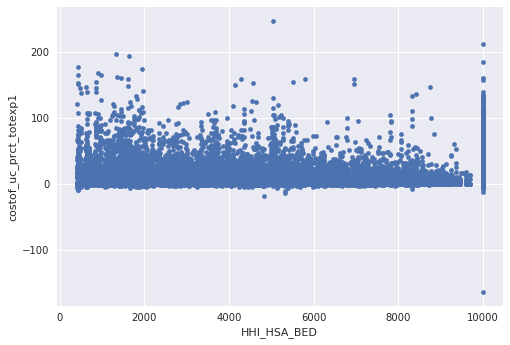

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

HCRIS_AHA['costof_uc_prct_totexp1'] = HCRIS_AHA['costof_uc_prct_totexp1']* 100
HCRIS_AHA.plot(x='HHI_HSA_BED', y='costof_uc_prct_totexp1', kind='scatter')
plt.show()

In [54]:
#import statsmodels.api as sm 

#independent_variable = ['HHI_HSA_BED', 'ControlCode', 'tottotrev', 'totcost', 'Year']
#reg1 = sm.OLS(endog=HCRIS_AHA['costof_uc_prct_totexp1'], exog=HCRIS_AHA[independent_variable], missing='drop')
#type(reg1)